In [1]:
import cv2, os, pandas as pd, numpy as np, tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from tensorflow.keras import models, layers, losses, optimizers
from sklearn.utils import shuffle

In [2]:
data_path = './images/'
label_path = './labels/foid_labels_bbox_v012.csv'

EDA

In [3]:
df = pd.read_csv(label_path)
df.head(50)

,img_id,bbox_id,x_min,x_max,y_min,y_max,label_l1,label_l2
0,94a69b66-23f0-11e9-a78e-2f2b7983ac0d,1,438,529,0,132,Human,HUMAN
1,94a6a3a4-23f0-11e9-a78f-ebd9c88ef3e8,2,433,529,0,131,Human,HUMAN
2,94a6a430-23f0-11e9-a790-2b5f72f1667a,3,440,529,0,132,Human,HUMAN
3,94a6a48a-23f0-11e9-a791-fb958b6ab6b3,4,452,550,0,154,Human,HUMAN
4,94a6a4da-23f0-11e9-a792-f320b734bd9b,5,462,550,0,153,Human,HUMAN
5,94a6a534-23f0-11e9-a793-c7e8fecc9fa8,6,396,531,11,173,Human,HUMAN
6,94a6a534-23f0-11e9-a793-c7e8fecc9fa8,7,114,336,326,458,Human,HUMAN
7,94a6a584-23f0-11e9-a794-0fe64977c9b7,8,104,351,323,460,Human,HUMAN
8,94a6a584-23f0-11e9-a794-0fe64977c9b7,9,393,531,11,171,Human,HUMAN
9,94a6a5de-23f0-11e9-a795-6b168e42914e,10,396,532,12,173,Human,HUMAN


In [4]:
df.isnull().sum()

img_id      0
bbox_id     0
x_min       0
x_max       0
y_min       0
y_max       0
label_l1    0
label_l2    0
dtype: int64

In [5]:
df.drop('label_l2', axis=1)

,img_id,bbox_id,x_min,x_max,y_min,y_max,label_l1
0,94a69b66-23f0-11e9-a78e-2f2b7983ac0d,1,438,529,0,132,Human
1,94a6a3a4-23f0-11e9-a78f-ebd9c88ef3e8,2,433,529,0,131,Human
2,94a6a430-23f0-11e9-a790-2b5f72f1667a,3,440,529,0,132,Human
3,94a6a48a-23f0-11e9-a791-fb958b6ab6b3,4,452,550,0,154,Human
4,94a6a4da-23f0-11e9-a792-f320b734bd9b,5,462,550,0,153,Human
...,...,...,...,...,...,...,...
159114,94ff8c1c-23f0-11e9-8e66-1713bcf73895,162923,543,691,163,464,Human
159115,94ff8c1c-23f0-11e9-8e66-1713bcf73895,162922,573,633,316,501,Albacore
159116,94ff8c1c-23f0-11e9-8e66-1713bcf73895,162924,591,737,314,569,Human
159117,94ff8c80-23f0-11e9-8e67-5787808a5ab7,162925,538,675,173,466,Human


In [6]:
unique_label = df['label_l1'].unique()
unique_label

array(['Human', 'No fish', 'Yellowfin tuna', 'Albacore', 'Wahoo',
       'Indo Pacific sailfish', 'Oilfish', 'Mahi mahi', 'Bigeye tuna',
       'Skipjack tuna', 'Striped marlin', 'Swordfish', 'Shark', 'Opah',
       'Sickle pomfret', 'Great barracuda', 'Black marlin', 'Unknown',
       'Shortbill spearfish', 'Roudie scolar', 'Long snouted lancetfish',
       'Thresher shark', 'Pelagic stingray', 'Snake mackerel',
       'Blue marlin', 'Rainbow runner', 'Pomfret', 'Mola mola'],
      dtype=object)

In [7]:
df['isfish'] = df['label_l1'].apply(lambda x: 0 if x in ['No Fish','Human'] else 1)

In [8]:
df.head(100)

,img_id,bbox_id,x_min,x_max,y_min,y_max,label_l1,label_l2,isfish
0,94a69b66-23f0-11e9-a78e-2f2b7983ac0d,1,438,529,0,132,Human,HUMAN,0
1,94a6a3a4-23f0-11e9-a78f-ebd9c88ef3e8,2,433,529,0,131,Human,HUMAN,0
2,94a6a430-23f0-11e9-a790-2b5f72f1667a,3,440,529,0,132,Human,HUMAN,0
3,94a6a48a-23f0-11e9-a791-fb958b6ab6b3,4,452,550,0,154,Human,HUMAN,0
4,94a6a4da-23f0-11e9-a792-f320b734bd9b,5,462,550,0,153,Human,HUMAN,0
...,...,...,...,...,...,...,...,...,...
95,94a6b7ae-23f0-11e9-a7cd-477b23aa47ed,96,0,149,282,412,Human,HUMAN,0
96,94a6b7ae-23f0-11e9-a7cd-477b23aa47ed,97,379,573,526,719,Human,HUMAN,0
97,94a6b7ae-23f0-11e9-a7cd-477b23aa47ed,98,40,151,544,712,Yellowfin tuna,YFT,1
98,94a6b7ae-23f0-11e9-a7cd-477b23aa47ed,99,209,382,241,437,Human,HUMAN,0


0 for no fish in image
1 for there's a fish in image

In [9]:
df['isfish'].value_counts()

isfish
0    104503
1     54616
Name: count, dtype: int64

workflow and to do list <br>
[v] load data<br>
[ ] do feature extraction using HOG, color histogram, and local binary<br>
[ ] rebalance the dataset<br>
[ ] normalize coordinates during training<br>
[ ] combine BCE and MSE<br>
[ ] apply bounding box only if there is fish <br>
[ ] predict and draw bounding box if probability is bigger than 50%<br>



feature extraction

In [10]:
def hog_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # if len(gray.shape) != 2:
    #     gray = gray.squeeze()
    features= hog(
        gray,
        orientations=8,
        pixels_per_cell=(16, 16),
        cells_per_block=(1, 1),
        # visualize=False,
        # channel_axis=None,
    )
    return features

In [11]:
def color_histogram_features(img, bins=(8,8,8)):
    chf = cv2.calcHist([img],[0,1,2],None, bins, [0,256,0,256,0,256])
    cv2.normalize(chf,chf)
    return chf.flatten()

In [12]:
def local_binary_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbf = local_binary_pattern(gray,8,1)
    (hist, _) = np.histogram(lbf.ravel(), bins=np.arange(0,11), range=(0,10))
    hist = hist.astype('float')
    hist /= (hist.sum() + 1e-6)
    return hist


In [13]:
def extract_features(img):
    hog_image = hog_features(img)
    chf_image = color_histogram_features(img)
    lbf_image = local_binary_features(img)
    return np.concatenate([hog_image,chf_image,lbf_image])

In [14]:
IMAGE_SIZE = (128,128)

In [15]:
# limit for total data loaded
limit = 8000
# test limit for testing data out side 
test_limit = 0

features , labels, box= [],[],[]

for i , row in df.iterrows():
    if i > limit:
        break

    img_path = os.path.join(data_path, row['img_id'] + '.jpg')
    if not os.path.exists(img_path):
        continue

    img = cv2.imread(img_path)
    img = cv2.resize(img, IMAGE_SIZE)

    feature = extract_features(img)
    features.append(feature)

    label = row['isfish']
    labels.append(label)

    x_min = row['x_min'] / 128
    x_max = row['x_max'] / 128
    y_min = row['y_min'] / 128
    y_max = row['y_max'] / 128
    box.append([x_min,y_min,x_max,y_max])

    print(f"{i} images load")
x = np.array(features)
y_label = np.array(labels).reshape(-1,1)
y_box = np.array(box)
y = np.concatenate([y_label,y_box], axis=1)

0 images load
1 images load
2 images load
3 images load
4 images load
5 images load
6 images load
7 images load
8 images load
9 images load
10 images load
11 images load
12 images load
13 images load
14 images load
15 images load
16 images load
17 images load
18 images load
19 images load
20 images load
21 images load
22 images load
23 images load
24 images load
25 images load
26 images load
27 images load
28 images load
29 images load
30 images load
31 images load
32 images load
33 images load
34 images load
35 images load
36 images load
37 images load
38 images load
39 images load
40 images load
41 images load
42 images load
43 images load
44 images load
45 images load
46 images load
47 images load
48 images load
49 images load
50 images load
51 images load
52 images load
53 images load
54 images load
55 images load
56 images load
57 images load
58 images load
59 images load
60 images load
61 images load
62 images load
63 images load
64 images load
65 images load
66 images load
67 im

In [16]:
unique, counts = np.unique(y_label, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(5706), np.int64(1): np.int64(2295)}


rebalancing dataset to 2295 for x and y dataset

In [17]:
# limit for the rebalancing data
data_limit = 2295

fish_count , no_fish_count = 0,0
# label and bounding box combined
x_balance , y_balance = [],[]
# label and bounding box seperated
y_balance_label, y_balance_box = [],[]
# fish and no fish seperated
x_fish , y_fish, y_fish_box = [],[],[]
x_no_fish, y_no_fish, y_no_fish_box = [],[],[]

for i in range(len(y_label)):
    label = y_label[i]
    if label == 1 and fish_count < data_limit:
        x_balance.append(x[i])
        y_balance.append(y[i])
        y_balance_label.append(y_label[i])
        y_balance_box.append(y_box[i])
        x_fish.append(x[i])
        y_fish.append(y_label[i])
        y_fish_box.append(y_box[i])
        
        fish_count += 1
    elif label == 0 and no_fish_count < data_limit:
        x_balance.append(x[i])
        y_balance.append(y[i])
        y_balance_label.append(y_label[i])
        y_balance_box.append(y_box[i])
        x_no_fish.append(x[i])
        y_no_fish.append(y_label[i])
        y_no_fish_box.append(y_box[i])

        no_fish_count += 1

    if fish_count >= data_limit and no_fish_count >= data_limit:
        break

In [18]:
np.shape(y_balance)

(4590, 5)

In [19]:
np.shape(x_balance)

(4590, 1034)

In [20]:
x_balance_np = np.array(x_balance)
y_balance_np = np.array(y_balance)
# y_balance_np_label = np.array(y_balance_label)
# y_balance_np_box = np.array(y_balance_box)

In [21]:
y_balance_np_label = np.array(y_balance_label)


In [22]:
y_balance_box[1]

array([3.3828125, 0.       , 4.1328125, 1.0234375])

In [23]:
y_balance

[array([0.       , 3.421875 , 0.       , 4.1328125, 1.03125  ]),
 array([0.       , 3.3828125, 0.       , 4.1328125, 1.0234375]),
 array([0.       , 3.4375   , 0.       , 4.1328125, 1.03125  ]),
 array([0.      , 3.53125 , 0.      , 4.296875, 1.203125]),
 array([0.       , 3.609375 , 0.       , 4.296875 , 1.1953125]),
 array([0.       , 3.09375  , 0.0859375, 4.1484375, 1.3515625]),
 array([0.      , 0.890625, 2.546875, 2.625   , 3.578125]),
 array([0.       , 0.8125   , 2.5234375, 2.7421875, 3.59375  ]),
 array([0.       , 3.0703125, 0.0859375, 4.1484375, 1.3359375]),
 array([0.       , 3.09375  , 0.09375  , 4.15625  , 1.3515625]),
 array([0.       , 0.6640625, 2.546875 , 2.625    , 3.6015625]),
 array([0.       , 3.0859375, 0.09375  , 4.1484375, 1.359375 ]),
 array([0.       , 0.6796875, 2.5234375, 2.6328125, 3.609375 ]),
 array([0.       , 0.703125 , 2.5234375, 2.4765625, 3.578125 ]),
 array([0.       , 3.1015625, 0.109375 , 4.1484375, 1.328125 ]),
 array([0.       , 0.       , 2.156

In [24]:
y_balance_np

array([[0.       , 3.421875 , 0.       , 4.1328125, 1.03125  ],
       [0.       , 3.3828125, 0.       , 4.1328125, 1.0234375],
       [0.       , 3.4375   , 0.       , 4.1328125, 1.03125  ],
       ...,
       [1.       , 2.7734375, 3.3828125, 3.8984375, 3.9453125],
       [1.       , 3.390625 , 2.75     , 4.1875   , 3.5546875],
       [1.       , 1.1875   , 3.171875 , 2.0078125, 3.59375  ]],
      shape=(4590, 5))

In [25]:
unique, counts = np.unique(y_balance_np[:, 0], return_counts=True)
print(dict(zip(unique, counts)))

{np.float64(0.0): np.int64(2295), np.float64(1.0): np.int64(2295)}


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_balance_np, y_balance_np, test_size=0.15,random_state=42)


In [27]:
np.shape(x_train)

(3901, 1034)

In [28]:
np.shape(y_train)

(3901, 5)

In [29]:
np.shape(y_test)

(689, 5)

In [30]:
print(f"x {len(x_balance)} y label {len(y_balance_label)} y box {len(y_balance_box)}")

x 4590 y label 4590 y box 4590


splitting data for training, validation and testing

In [31]:
# splitting label and box seperated
x_balance2, y_balance_label2, y_balance_box2 = shuffle(x_balance,y_balance_label,y_balance_box, random_state=32)

In [32]:
x_train2, x_temp2, y_label_train2, y_label_temp2, y_box_train2, y_box_temp2 = train_test_split(
    x_balance2,
    y_balance_label2,
    y_balance_box2, 
    test_size=0.3,
    random_state=42
)

In [33]:
x_val2, x_test2, y_label_val2, y_label_test2, y_box_val2, y_box_test2 = train_test_split(
    x_temp2, 
    y_label_temp2,  
    y_box_temp2,
    test_size=0.5, 
    random_state=42
)

In [36]:
print(f"Training set: {len(x_train2)}")
print(f"Validation set: {len(x_val2)}")
print(f"Test set: {len(x_test2)}")

Training set: 3213
Validation set: 688
Test set: 689


In [64]:
x_train2 = np.array(x_train2)
y_label_train2 = np.array(y_label_train2)
y_box_train2 = np.array(y_box_train2)

x_val2 = np.array(x_val2)
y_label_val2 = np.array(y_label_val2)
y_box_val2 = np.array(y_box_val2)

x_test2 = np.array(x_test2)
y_label_test2 = np.array(y_label_test2)
y_box_test2 = np.array(y_box_test2)

print("--- Training Data Shapes ---")
print(f"x_train2 shape:       {x_train2.shape}")
print(f"y_label_train2 shape: {y_label_train2.shape}")
print(f"y_box_train2 shape:   {y_box_train2.shape}")

print("\n--- Validation Data Shapes ---")
print(f"x_val2 shape:         {x_val2.shape}")
print(f"y_label_val2 shape:   {y_label_val2.shape}")
print(f"y_box_val2 shape:     {y_box_val2.shape}")

print("--- Test Data Shapes ---")
print(f"x_test2 shape:       {x_test2.shape}")
print(f"y_label_test2 shape: {y_label_test2.shape}")
print(f"y_box_test2 shape:   {y_box_test2.shape}")

--- Training Data Shapes ---
x_train2 shape:       (3213, 1034)
y_label_train2 shape: (3213, 1)
y_box_train2 shape:   (3213, 4)

--- Validation Data Shapes ---
x_val2 shape:         (688, 1034)
y_label_val2 shape:   (688, 1)
y_box_val2 shape:     (688, 4)
--- Test Data Shapes ---
x_test2 shape:       (689, 1034)
y_label_test2 shape: (689, 1)
y_box_test2 shape:   (689, 4)


Model creation

In [37]:
input_shape = x_balance_np.shape[1]
input_shape

1034

In [53]:
inputs = layers.Input(shape=(input_shape,))

x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256,activation='relu')(x)
x = layers.Dense(128,activation='relu')(x)

# classification section
class_output = layers.Dense(1,activation='sigmoid', name='class_output')(x)

# bounding box section
box_output = layers.Dense(4,activation='linear',name="box_output")(x)

model = models.Model(inputs=inputs, outputs=[class_output,box_output])

In [54]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 1034)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 512)       │    529,920 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 512)       │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 256)       │    131,328 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128)       │     32,896 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_output        │ (None, 1)         │        129 │ dense_11[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ box_output (Dense)  │ (None, 4)         │        516 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 694,789 (2.65 MB)

 Trainable params: 694,789 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.compile(
    optimizer=optimizers.AdamW(learning_rate=0.001),
    loss={
        'class_output' : 'binary_crossentropy',
        'box_output' : 'mse'
    },
    loss_weights = {'class_output': 1.0, 'box_output': 0.5},
    metrics = {'class_output': 'accuracy'}
)

In [ ]:
history = model.fit(
    x_train2,
    [y_label_train2,y_box_train2],
    epochs = 50,
    batch_size = 64,
    validation_data = (x_val2,[y_label_val2,y_box_val2]),
    verbose=1
    
)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - box_output_loss: 1.8499 - class_output_accuracy: 0.8596 - class_output_loss: 0.3244 - loss: 1.2524 - val_box_output_loss: 1.9566 - val_class_output_accuracy: 0.8430 - val_class_output_loss: 0.3813 - val_loss: 1.3716
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - box_output_loss: 1.8098 - class_output_accuracy: 0.8590 - class_output_loss: 0.3319 - loss: 1.2360 - val_box_output_loss: 1.8878 - val_class_output_accuracy: 0.8430 - val_class_output_loss: 0.3700 - val_loss: 1.3300
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - box_output_loss: 2.0431 - class_output_accuracy: 0.8431 - class_output_loss: 0.3782 - loss: 1.4082 - val_box_output_loss: 1.9573 - val_class_output_accuracy: 0.8430 - val_class_output_loss: 0.3980 - val_loss: 1.3844
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - box_output_loss: 1.8562 - class_output_accuracy: 0.8531 - class_output_loss: 0.3458 - loss: 1.2788 - val_box_output_loss: 1.9104 - val_class

In [116]:
results = model.evaluate(
    x_test2, 
    [y_label_test2, y_box_test2], 
    batch_size=32, 
    verbose=2
)

22/22 - 0s - 4ms/step - box_output_loss: 2.2746 - class_output_accuracy: 0.8534 - class_output_loss: 0.4315 - loss: 1.5566


In [117]:
results = model.evaluate(
    x_test2, 
    [y_label_test2, y_box_test2], 
    batch_size=32, 
    verbose=2
)

22/22 - 0s - 4ms/step - box_output_loss: 2.2746 - class_output_accuracy: 0.8534 - class_output_loss: 0.4315 - loss: 1.5566


In [111]:
results = model.evaluate(
    x_test2, 
    [y_label_test2, y_box_test2], 
    batch_size=32, 
    verbose=2
)

22/22 - 0s - 4ms/step - box_output_loss: 2.2630 - class_output_accuracy: 0.8505 - class_output_loss: 0.4166 - loss: 1.5318


In [118]:
total_loss = results[0]
class_loss = results[1]
box_loss = results[2]
class_accuracy = results[3]
print(f"Total Loss:     {total_loss:.4f}")
print(f"Accuracy:       {class_accuracy:.4f}")
print("\n--- Individual Losses ---")
print(f"Class Loss:     {class_loss:.4f}")
print(f"Box Loss:       {box_loss:.4f}")

Total Loss:     1.5566
Accuracy:       0.8534

--- Individual Losses ---
Class Loss:     0.4315
Box Loss:       2.2746


In [119]:
predictions = model.predict(x_test2)
y_pred_probabilities = predictions[0]
y_pred_labels = (y_pred_probabilities > 0.5).astype(int)
y_true_labels = y_label_test2

target_names = ['No Fish (0)', 'Is Fish (1)']
print(classification_report(y_true_labels, y_pred_labels, target_names=target_names))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

 No Fish (0)       0.81      0.93      0.87       351
 Is Fish (1)       0.92      0.77      0.84       338

    accuracy                           0.85       689
   macro avg       0.86      0.85      0.85       689
weighted avg       0.86      0.85      0.85       689



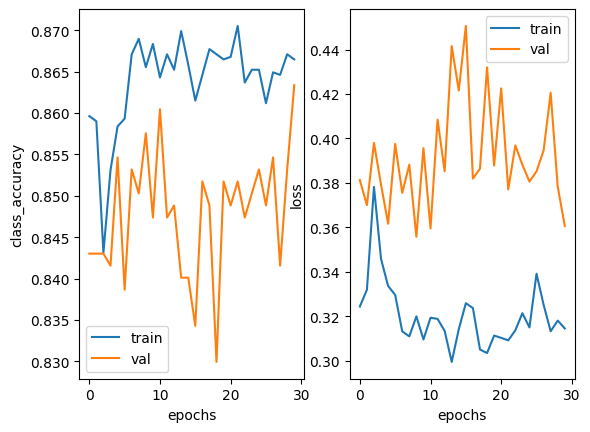

In [120]:
plt.Figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(history.history['class_output_accuracy'],label="train")
plt.plot(history.history['val_class_output_accuracy'],label='val')
plt.xlabel('epochs')
plt.ylabel('class_accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['class_output_loss'],label="train")
plt.plot(history.history['val_class_output_loss'],label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# using adamw